# Quantifying Shakespeare
Analyzing the frequencies of the different letters in Shakespere's work.

(Data from: bit.ly/shakespeare-txt)

In this notebook we will:
1. Read all of Shakespeare's works into a list of strings
2.  Count the frequencies of letters used
3. Vizualize the frequencies with a bar graph

## Read lines of the data

In [24]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Save each line of the data as a list of strings."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")

    for line in file_handle:
        # removing white spaces (strip leading and trailing white spaces)
        line = line.strip()

        # make everything in the file lowercase
        line = line.lower()

        lines.append(line)
    file_handle.close()
    return lines

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))


124456


In [25]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by increasing the value stroed at key by one."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


In [26]:
d: dict[str, int] = {}

tally(d, "a")
print(d)

tally(d, "a")
print(d)

tally(d, "b")
print(d)

{'a': 1}
{'a': 2}
{'a': 2, 'b': 1}


In [27]:
def count_letters(lines: list[str]) -> dict[str, int]:
    """Counts letters in lines."""
    new_dictionary: dict[str, int] = {}

    for line in lines:
        for character in line:
            if character.isalpha():
                tally(new_dictionary, character)
    
    return new_dictionary

In [28]:
input = ["h.", "hi", "hi3", "natalie.", "312"]
print(count_letters(input))

{'h': 3, 'i': 3, 'n': 1, 'a': 2, 't': 1, 'l': 1, 'e': 1}


In [29]:
shakes_letters = count_letters(shakes_lines)
print(shakes_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, 'e': 447204, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, 'a': 289150, 'w': 89390, 'm': 111452, 'k': 35408, 'v': 37569, 'z': 1631, 'q': 3582}


## Sorting in Lists and Dictionaries


In [30]:
# Get list of items in a dictioanry
shakes_letters_list = list(shakes_letters.items())
print(shakes_letters_list)

# Sort
shakes_letters_list_sort = sorted(shakes_letters_list)
print(shakes_letters_list_sort)

# List to Dict
shakes_letters_list_sort_to_dict = dict(shakes_letters_list_sort)
print(shakes_letters_list_sort_to_dict)

[('t', 329775), ('h', 236868), ('i', 253990), ('s', 248989), ('e', 447204), ('x', 5294), ('f', 80516), ('l', 170019), ('p', 58464), ('r', 237864), ('n', 243262), ('d', 149462), ('b', 61956), ('y', 94370), ('o', 314600), ('j', 4779), ('c', 88185), ('g', 68199), ('u', 128947), ('a', 289150), ('w', 89390), ('m', 111452), ('k', 35408), ('v', 37569), ('z', 1631), ('q', 3582)]
[('a', 289150), ('b', 61956), ('c', 88185), ('d', 149462), ('e', 447204), ('f', 80516), ('g', 68199), ('h', 236868), ('i', 253990), ('j', 4779), ('k', 35408), ('l', 170019), ('m', 111452), ('n', 243262), ('o', 314600), ('p', 58464), ('q', 3582), ('r', 237864), ('s', 248989), ('t', 329775), ('u', 128947), ('v', 37569), ('w', 89390), ('x', 5294), ('y', 94370), ('z', 1631)]
{'a': 289150, 'b': 61956, 'c': 88185, 'd': 149462, 'e': 447204, 'f': 80516, 'g': 68199, 'h': 236868, 'i': 253990, 'j': 4779, 'k': 35408, 'l': 170019, 'm': 111452, 'n': 243262, 'o': 314600, 'p': 58464, 'q': 3582, 'r': 237864, 's': 248989, 't': 329775, '

## Visualize Data in Bar Graph

<BarContainer object of 26 artists>

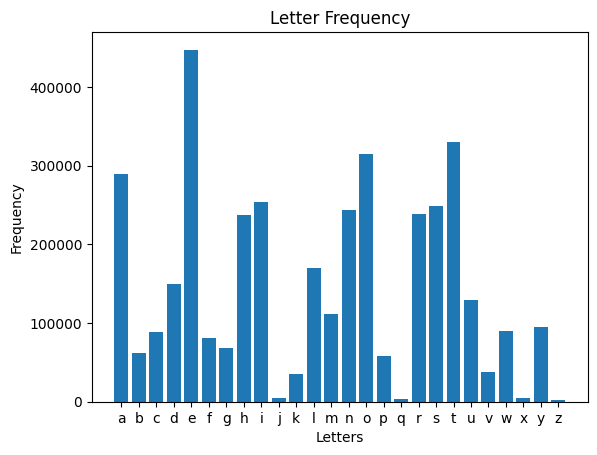

In [32]:
from matplotlib import pyplot

# Changes title of the plot
pyplot.title("Letter Frequency")

# Change axis' titles
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")

x_values: list[str] = shakes_letters_list_sort_to_dict.keys()
y_values: list[int] = shakes_letters_list_sort_to_dict.values()

pyplot.bar(x_values, y_values)